In [ ]:
# Checking tensorflow version

In [21]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Mounting Drive

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing everything is needed.

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import nltk
nltk.download('stopwords')

import numpy as np
import tensorflow as tf
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(oov_token="<OOV>")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Reading .CSV file
file_link = "/content/drive/MyDrive/PublicAIData/amazon_baby.csv"
df = pd.read_csv(file_link, encoding='ISO-8859-1')

In [25]:
df.size

550593

In [ ]:
# Adding sentiment for learning properly

In [26]:
df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)

In [ ]:
# Splitting the data into training and testing

In [27]:
split = round(len(df)*0.8)
train_reviews = df['review'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review'][split:]
test_label = df['sentiments'][split:]

In [28]:
train_reviews.tail()

146820    I ordered this based upon the good reviews tha...
146821    Purchased this stroller for our trip and I lov...
146822    Very good quality, color, love it!!! Just was ...
146823    This is a great umbrella stroller, all my frie...
146824    I am a very active mom and used my carseat/str...
Name: review, dtype: object

In [ ]:
# In order to avoid any issues for casting to str, we'll create a object for doing this step.

In [29]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

Defining static values.

In [30]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
# Tokenizer for the senteces

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
# Seq and padded

In [32]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
#Model creation.

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
#Compile model.

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Model Summary

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           640000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 24)                46104     
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 686417 (2.62 MB)
Trainable params: 686417 (2.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#Training the model.

In [36]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [37]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))



Epoch 1/10
4589/4589 [==============================] - 58s 12ms/step - loss: 0.2372 - accuracy: 0.9018 - val_loss: 0.1960 - val_accuracy: 0.9194
Epoch 2/10
4589/4589 [==============================] - 28s 6ms/step - loss: 0.1695 - accuracy: 0.9304 - val_loss: 0.2047 - val_accuracy: 0.9181
Epoch 3/10
4589/4589 [==============================] - 22s 5ms/step - loss: 0.1055 - accuracy: 0.9596 - val_loss: 0.2653 - val_accuracy: 0.9079
Epoch 4/10
4589/4589 [==============================] - 24s 5ms/step - loss: 0.0586 - accuracy: 0.9781 - val_loss: 0.3484 - val_accuracy: 0.9037
Epoch 5/10
4589/4589 [==============================] - 22s 5ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.4406 - val_accuracy: 0.8977
Epoch 6/10
4589/4589 [==============================] - 23s 5ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.5132 - val_accuracy: 0.8980
Epoch 7/10
4589/4589 [==============================] - 23s 5ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.5554 - val_a

In [24]:
#Ploting the graph

<Figure size 640x480 with 0 Axes>

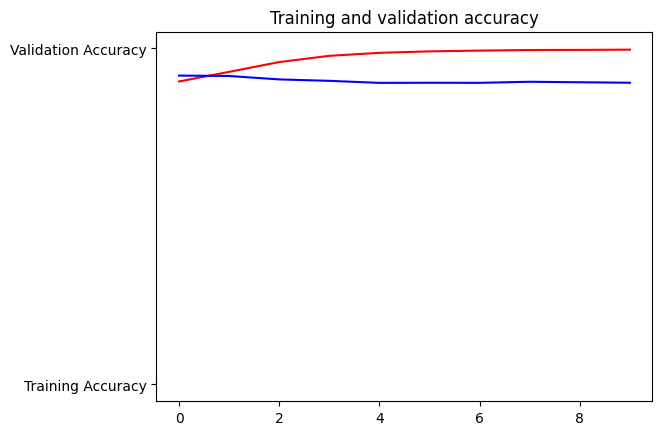

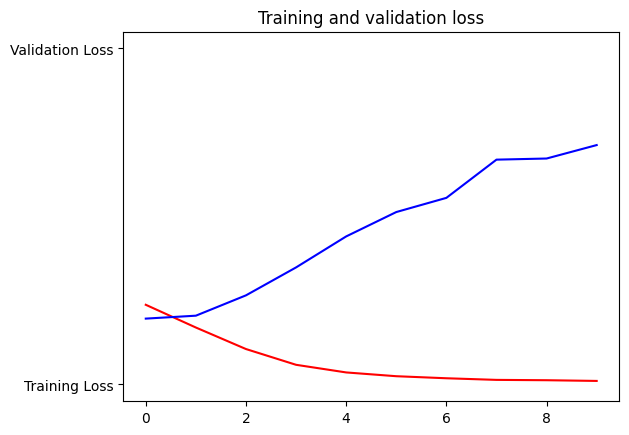

<Figure size 640x480 with 0 Axes>

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [30]:
# result = model.predict

In [ ]:
# you can also use a google play or app store for fetching the app reviews and define which sentiment it contains.

In [57]:
new_sentences = [
    'Im so glad I find this app!',
    'This app is so boring',
    'This app is so hilarious. I had a really great time!',
    'Very linear scenario, no surprises at all.',
    'Another amazing feature addition to the app with good improvements.',
    'This is a disaster app'
    ]

new_sequences = tokenizer.texts_to_sequences(new_sentences)
padded=pad_sequences(new_sequences, maxlen=max_length,truncating=trunc_type)
output=model.predict(padded)

for i in range(0,len(new_sentences)):
    print('Review: '+new_sentences[i]+''+' - Sentiment: '+str(output[i])+'\n')

1/1 [==============================] - 0s 20ms/step
Review: Im so glad I find this app! - Sentiment: [0.7951198]

Review: This app is so boring - Sentiment: [0.4732494]

Review: This app is so hilarious. I had a really great time! - Sentiment: [0.7758021]

Review: Very linear scenario, no surprises at all. - Sentiment: [0.01600182]

Review: Another amazing feature addition to the app with good improvements. - Sentiment: [0.91387874]

Review: This is a disaster app - Sentiment: [0.48032495]



In [ ]:
#Saving the model

In [58]:
import os
directory = os.path.join(os.getcwd(), 'comment_predict_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'app_review_trained_model.h5')
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Downloading the model

In [59]:
from google.colab import files
files.download(os.path.join(directory, 'app_review_trained_model.h5'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>